In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BooksDataFrame.csv")

In [3]:
rating_map = {"One":1, "Two":2, "Three":3, "Four":4, "Five":5}
df['Rating'] = df['Rating'].map(rating_map)

In [4]:
df

,Title,Price,Category,Status,Stock Count,Rating,UPC
0,A Light in the Attic,51.77,Poetry,In stock,22,3,a897fe39b1053632
1,Tipping the Velvet,53.74,Historical Fiction,In stock,20,1,90fa61229261140a
2,Soumission,50.10,Fiction,In stock,20,1,6957f44c3847a760
3,Sharp Objects,47.82,Mystery,In stock,20,4,e00eb4fd7b871a48
4,Sapiens: A Brief History of Humankind,54.23,History,In stock,20,5,4165285e1663650f
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,Classics,In stock,1,1,cd2a2a70dd5d176d
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Sequential Art,In stock,1,4,bfd5e1701c862ac3
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Historical Fiction,In stock,1,5,19fec36a1dfb4c16
998,1st to Die (Women's Murder Club #1),53.98,Mystery,In stock,1,1,f684a82adc49f011


Text(0, 0.5, 'Number of Books')

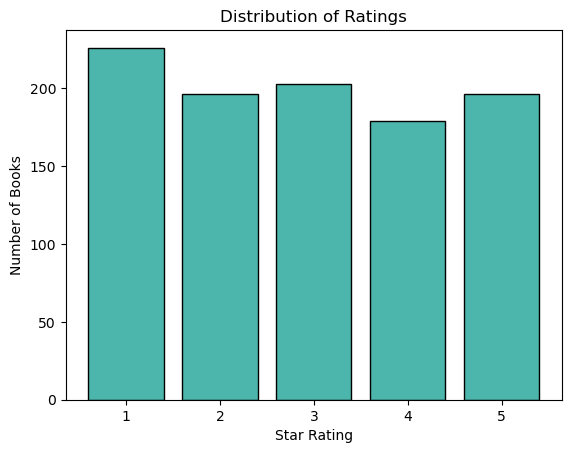

In [9]:
#Shows how many books fall into each star rating category.
rating = df['Rating'].value_counts()
plt.bar(rating.index, rating.values, color="#4DB6AC", edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Books")

Text(0.5, 1.0, 'Book Availability (In-stock vs Out-of-stock)')

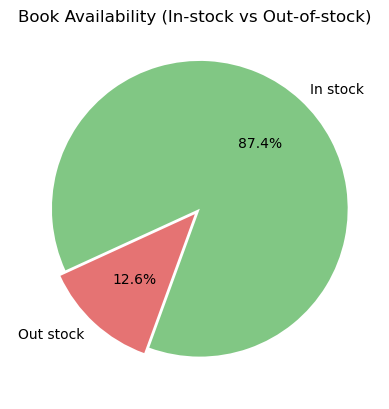

In [11]:
#Shows the proportion of books available vs unavailable
Status_Counts = df['Status'].value_counts()
colors = ['#81C784', '#E57373']  # green = in stock, red = out of stock
plt.pie(Status_Counts,
        labels=Status_Counts.index,
        colors=colors,
        explode=(0.05,0),
        startangle=250,
        autopct='%1.1f%%')
plt.title("Book Availability (In-stock vs Out-of-stock)")

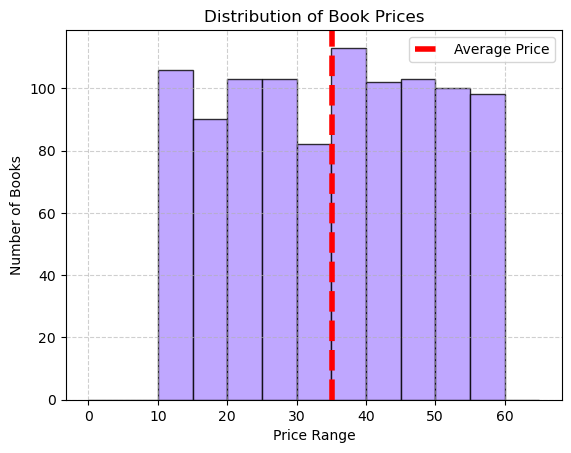

In [13]:
#Shows how book prices are distributed; red dashed line shows average price
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
plt.hist(df['Price'], bins=bins, edgecolor='black', color="#AF91FF", alpha=0.8)
plt.axvline(np.mean(df['Price']), color='red', linestyle='--', linewidth=4, label="Average Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Distribution of Book Prices")
plt.xlabel("Price Range")
plt.ylabel("Number of Books")
plt.legend()

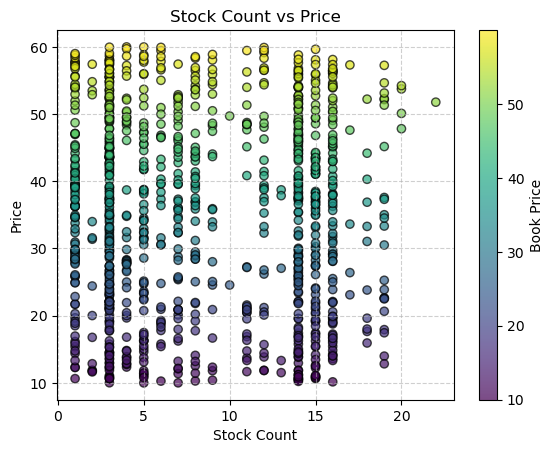

In [15]:
#Shows whether high-priced books have higher or lower stock counts
plt.scatter(df['Stock Count'], df['Price'], c=df['Price'], cmap='viridis', alpha=0.7, edgecolors="black")
plt.colorbar(label='Book Price')
plt.title("Stock Count vs Price")
plt.xlabel("Stock Count")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.6)

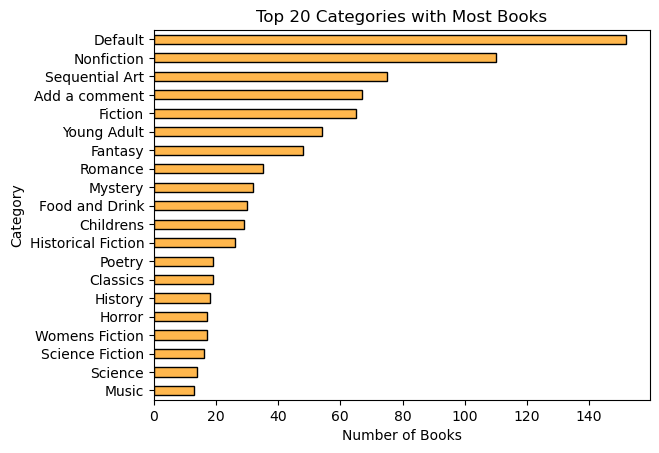

In [17]:
#Shows which categories have the most books
counts = df['Category'].value_counts().head(20)
counts.plot(kind='barh', color="#FFB74D", edgecolor="black")
plt.title("Top 20 Categories with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Category")
plt.gca().invert_yaxis() 

Text(0, 0.5, 'Stock Count')

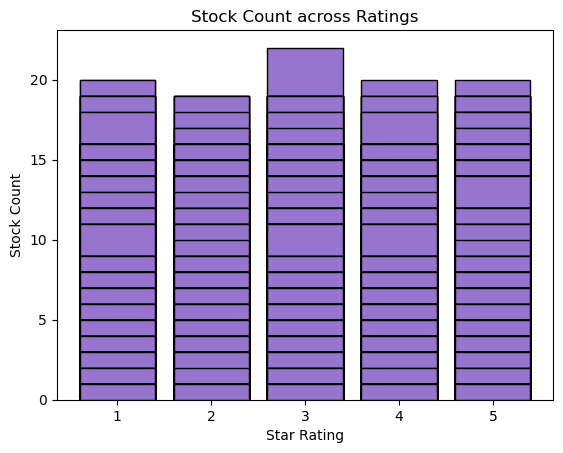

In [19]:
#Shows if higher-rated books are usually in stock more or less
plt.bar(df['Rating'], df['Stock Count'], color="#9575CD", edgecolor="black")
plt.title("Stock Count across Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Stock Count")

Text(0, 0.5, 'Book Price')

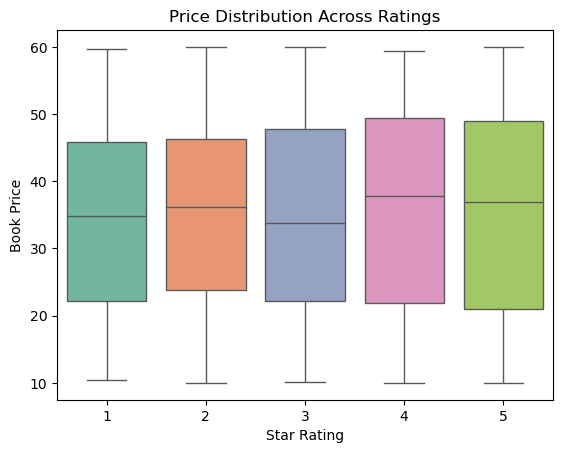

In [21]:
#Shows price spread for each rating (e.g., are 5-star books more expensive?)
sns.boxplot(x='Rating', y='Price', data=df, hue='Rating', palette="Set2", legend=False)
plt.title("Price Distribution Across Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Book Price")

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

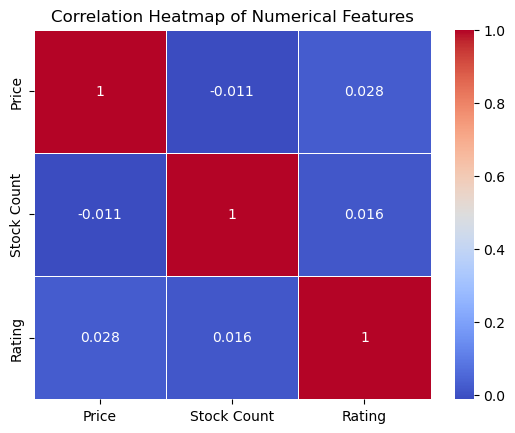

In [23]:
#Shows correlations (e.g., Price vs Stock Count, Rating vs Price)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Suspense'),
  Text(1, 0, 'Novels'),
  Text(2, 0, 'Politics'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'New Adult'),
  Text(5, 0, 'Christian'),
  Text(6, 0, 'Sports and Games'),
  Text(7, 0, 'Self Help'),
  Text(8, 0, 'Travel'),
  Text(9, 0, 'Fantasy')])

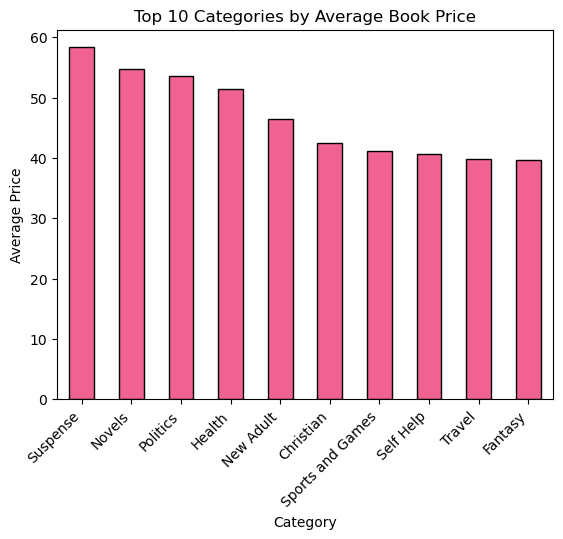

In [25]:
#Shows which categories are the most expensive on average
df.groupby("Category")["Price"].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', color="#F06292", edgecolor="black"
)
plt.title("Top 10 Categories by Average Book Price")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")

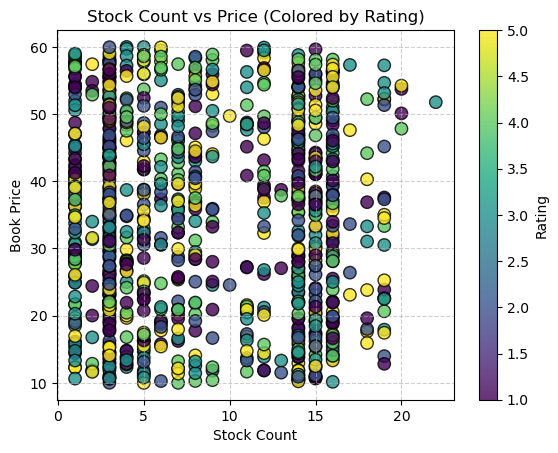

In [27]:
# Scatter plot with 3 entities (x, y, color)
plt.scatter(
    df['Stock Count'], 
    df['Price'], 
    c=df['Rating'],        
    cmap='viridis', 
    alpha=0.8, 
    edgecolors="black", 
    s=80                   
)
plt.colorbar(label='Rating')
plt.title("Stock Count vs Price (Colored by Rating)")
plt.xlabel("Stock Count")
plt.ylabel("Book Price")
plt.grid(True, linestyle='--', alpha=0.6)